In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as  plt
import random as rd
import numpy as np
from scipy.stats import skewnorm  
import scipy.stats as stats


In [4]:
def generate_gene_level(loc, scale, a, size=10000):# Parameters to center distribution at 0.3
    #loc location parameter (mean)
    #scale spread of distribution
    #a skew parameter

    # Generate skewed distribution
    skewed_data = stats.skewnorm.rvs(a, loc=loc, scale=scale, size=size)
    return list(skewed_data)

In [5]:
generate_gene_level(loc=0.2,scale=0.07,a=0.5)

[np.float64(0.24333222268596094),
 np.float64(0.21176411507224652),
 np.float64(0.2656868453106718),
 np.float64(0.24439155127363663),
 np.float64(0.250021406922168),
 np.float64(0.16784157312339648),
 np.float64(0.3236042235239307),
 np.float64(0.2890829832981996),
 np.float64(0.26730262879815764),
 np.float64(0.20419678648576395),
 np.float64(0.20702370290544791),
 np.float64(0.1657041668910414),
 np.float64(0.17793862431663945),
 np.float64(0.28830238980475165),
 np.float64(0.20165010841421355),
 np.float64(0.16990892824557002),
 np.float64(0.25861963851822667),
 np.float64(0.30983934078357156),
 np.float64(0.14548237527566393),
 np.float64(0.27508633863092746),
 np.float64(0.19803875899876808),
 np.float64(0.1545601261343547),
 np.float64(0.27553350740522675),
 np.float64(0.23176713866241339),
 np.float64(0.268875366820902),
 np.float64(0.23372641607684075),
 np.float64(0.21999874112616533),
 np.float64(0.17772644093336354),
 np.float64(0.25349418583682987),
 np.float64(0.123752104

In [6]:
rd.sample(list(generate_gene_level(loc=0.2,scale=0.07,a=0.5)), 500)

[np.float64(0.2969871781069916),
 np.float64(0.19189904402587993),
 np.float64(0.18108132942231592),
 np.float64(0.2648328394175557),
 np.float64(0.3270867734166717),
 np.float64(0.3162511025204218),
 np.float64(0.2543676349633724),
 np.float64(0.31049600720900056),
 np.float64(0.19100247973329915),
 np.float64(0.13934305108621375),
 np.float64(0.21473493552133774),
 np.float64(0.2828803712858913),
 np.float64(0.17812288698207093),
 np.float64(0.22877376707129227),
 np.float64(0.20123846104973905),
 np.float64(0.18457580536234944),
 np.float64(0.18934462161327834),
 np.float64(0.22583741925833334),
 np.float64(0.22925514715331569),
 np.float64(0.299011493327627),
 np.float64(0.2089012911274684),
 np.float64(0.28326014454995563),
 np.float64(0.29478307729555897),
 np.float64(0.08842304305468708),
 np.float64(0.141329169147195),
 np.float64(0.14820450882902478),
 np.float64(0.2579872866391104),
 np.float64(0.23535897879746728),
 np.float64(0.19662221001599167),
 np.float64(0.297922346783

In [7]:
def map_to_snp(value):
    if value < 1/3:
        return 0
    elif value < 2/3:
        return 1
    else:
        return 2

In [ ]:
from faker import Faker

country=['UK',"USA","France","Spain","Italy"]
education_level=['primary', 'high school','bachelor', 'master', 'phD']
dict_country={'UK':['London','Cardiff','Edimburgh'],'USA':['Los Angeles','New York'],'Spain':["Madrid","Barcelona"],"Italy":['Milan','Rome','Florence'],'France':['Paris','Rennes']}

def create_fake_data(N):
  """
  Creates a dataset with fake data.
  N: number of samples
  """
  fake = Faker()
  Faker.seed(4321)

    # Select a random item
  countries = [rd.choice(country)for _ in range(N) ]
  cities = [rd.choice(dict_country[countries[i]])for i in range(len(countries)) ]
  gender = [rd.randint(0,1) for _ in range(N)]
  names = [fake.name() for _ in range(N)]
  education = [rd.choice(education_level) for _ in range(N) ]
  ID = [i for i in range(N)]
  gene_1=rd.sample(generate_gene_level(loc=0.2,scale=0.07,a=0.5), N)
  gene_2=rd.sample(generate_gene_level(loc=0.9,scale=0.02,a=0.6), N)
  gene_3=rd.sample(generate_gene_level(loc=0.6,scale=0.07,a=0.5), N)
  gene_4=rd.sample(generate_gene_level(loc=0.1,scale=0.07,a=0.9), N)
  gene_5=rd.sample(generate_gene_level(loc=0.2,scale=0.07,a=-0.5), N)
  gene_6=rd.sample(generate_gene_level(loc=0.6,scale=0.3,a=0.2), N)
  gene_7=rd.sample(generate_gene_level(loc=0.7,scale=0.02,a=-0.6), N)
  gene_8=rd.sample(generate_gene_level(loc=0.2,scale=0.07,a=0.5), N)
  gene_9=rd.sample(generate_gene_level(loc=0.2,scale=0.07,a=0.5), N)
  gene_10=rd.sample(generate_gene_level(loc=0.1,scale=0.07,a=-0.9), N)
  SNP1=[map_to_snp(elem) for elem in gene_1]
  SNP2=[map_to_snp(elem) for elem in gene_2]
  SNP3=[map_to_snp(elem) for elem in gene_3]
  SNP4=[map_to_snp(elem) for elem in gene_4]
  SNP5=[map_to_snp(elem) for elem in gene_5]
  fake_df = pd.DataFrame({'ID':ID,'Name': names,  'sex':gender,'Country':countries, 'Cities':cities,'Education':education,'gene1':gene_1,'gene2':gene_2,'gene3':gene_3,'gene4':gene_4,'gene5':gene_5,'gene6':gene_6,'gene7':gene_7,'gene8':gene_8,'gene9':gene_9,'gene10':gene_10,'SNP1':SNP1, 'SNP2':SNP2, 'SNP3':SNP3, 'SNP4':SNP4, 'SNP5':SNP5})
  return fake_df

fake_users = create_fake_data(500)
fake_users


,ID,Name,sex,Country,Cities,Education,gene1,gene2,gene3,gene4,...,gene6,gene7,gene8,gene9,gene10,SNP1,SNP2,SNP3,SNP4,SNP5
0,0,Jason Brown,0,Spain,Barcelona,phD,0.269216,0.903254,0.646269,0.184103,...,1.337329,0.639346,0.086097,0.235021,-0.013831,0,2,1,0,0
1,1,Jacob Stein,0,UK,Cardiff,master,0.210124,0.901123,0.494345,0.131339,...,0.805539,0.676895,0.282784,0.141351,0.161855,0,2,1,0,0
2,2,Cody Brown,1,UK,Edimburgh,primary,0.260922,0.913036,0.579844,0.097878,...,-0.038785,0.699031,0.250115,0.210268,0.062741,0,2,1,0,0
3,3,Larry Morales,0,France,Rennes,primary,0.385999,0.894008,0.589488,0.159919,...,0.329324,0.707597,0.253070,0.229011,0.060683,1,2,1,0,0
4,4,Jessica Hendricks,1,France,Rennes,bachelor,0.286690,0.891863,0.507459,0.230507,...,0.085550,0.671024,0.270912,0.227023,0.102705,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Shawn Wallace,0,Spain,Barcelona,primary,0.292793,0.923240,0.502566,0.066857,...,0.438144,0.697286,0.226131,0.283544,0.155779,0,2,1,0,0
496,496,John Roberts,0,Italy,Milan,high school,0.116832,0.923691,0.657241,0.186710,...,0.703086,0.674695,0.290089,0.132427,0.099382,0,2,1,0,0
497,497,Matthew Ramos,0,France,Paris,phD,0.117878,0.889837,0.640957,0.087125,...,1.083326,0.690199,0.211142,0.319847,0.043498,0,2,1,0,0
498,498,Jackie Black,1,France,Paris,bachelor,0.267516,0.890584,0.628659,0.069503,...,1.010433,0.697338,0.152281,0.383321,0.045628,0,2,1,0,0


In [ ]:
def generate_gene_level(loc, scale, a, size=10000):# Parameters to center distribution at 0.3
    #loc location parameter (mean)
    #scale spread of distribution
    #a skew parameter

    # Generate skewed distribution
    skewed_data = stats.skewnorm.rvs(a, loc=loc, scale=scale, size=size)
    return skewed_data

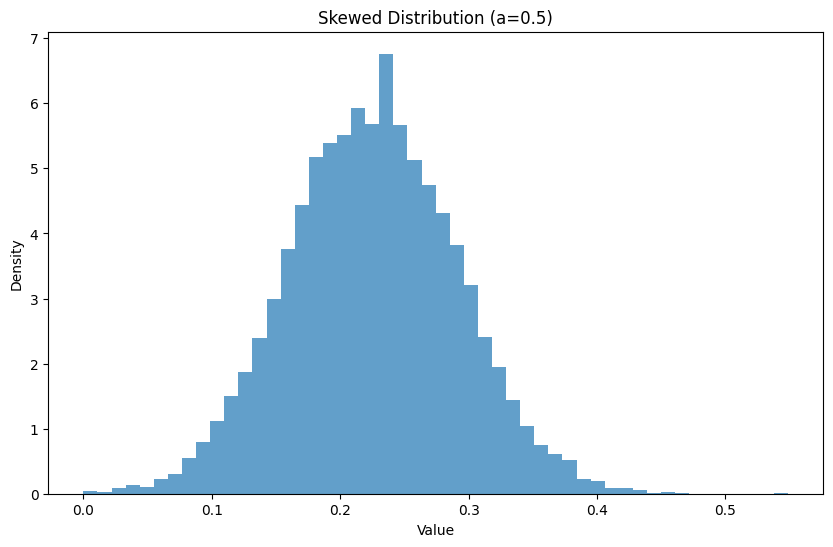

Mean: 0.22544849549839854
Median: 0.22555847052722794


In [ ]:

# Parameters to center distribution at 0.3
loc = 0.2  # location parameter (mean)
scale = 0.07  # spread of distribution
a = 0.5  # skew parameter

# Generate skewed distribution
skewed_data = stats.skewnorm.rvs(a, loc=loc, scale=scale, size=10000)

# Clip values between 0 and 1
skewed_data = np.clip(skewed_data, 0, 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(skewed_data, bins=50, density=True, alpha=0.7)
plt.title(f'Skewed Distribution (a={a})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# Print some statistics
print(f"Mean: {np.mean(skewed_data)}")
print(f"Median: {np.median(skewed_data)}")
